<a href="https://colab.research.google.com/github/yashasangani/DeepLearning-6th-July/blob/main/Binary_Classification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://raw.githubusercontent.com/yashasangani/Datasets/main/booking_train.csv

In [ ]:
https://raw.githubusercontent.com/yashasangani/Datasets/main/booking_test.csv

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

Step 1: Read the Dataset

In [3]:
import pandas as pd
url1 = 'https://raw.githubusercontent.com/yashasangani/Datasets/main/booking_train.csv'
df = pd.read_csv(url1)

In [4]:
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


### Step 2 : Perform vasic data quality checks

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [30]:
df.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [31]:
df.duplicated().sum()

0

## Step 3 : Seperate X and Y (booking_status)
id is stastically insignificant

In [9]:
X = df.drop(columns=['id','booking_status'])
Y = df[['booking_status']]
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [32]:
Y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


### Step 4 : Perform preprocessing on X

In [33]:
X.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
dtype: object

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [37]:
num_pipe = Pipeline(steps = [('impute',SimpleImputer(strategy = 'median')),
                             ('scaler', StandardScaler())]).set_output(transform = 'pandas')


In [38]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691


## Step : 5 Train test split

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [40]:
X_train.shape

(33680, 17)

In [41]:
Y_train.shape

(33680, 1)

In [42]:
X_test.shape

(8420, 17)

## Building Neuron Network
Dropout layer - Randomly drop some % of neuron links




In [43]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout

In [44]:
# Initialize the model
model = Sequential()

# Add the input layer and the first hidden layer

model.add(Input(shape=(X_train.shape[1],)))

# Hidden layer 1
model.add(Dense(64 , activation='relu'))
# add Dropout layer 1
model.add(Dropout(0.4))

# Hidden layer 2
model.add(Dense(32, activation='relu'))
# add Dropout layer 2
model.add(Dropout(0.3))

# Add Outer layer
model.add(Dense(1, activation='sigmoid'))

model.summary()




Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1152      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [48]:
hist = model.fit(X_train, Y_train, epochs=60, validation_split=0.2)

Epoch 1/60
842/842 [==============================] - 4s 4ms/step - loss: 0.6697 - accuracy: 0.6079 - val_loss: 0.6715 - val_accuracy: 0.6038
Epoch 2/60
842/842 [==============================] - 3s 4ms/step - loss: 0.6702 - accuracy: 0.6079 - val_loss: 0.6715 - val_accuracy: 0.6038
Epoch 3/60
842/842 [==============================] - 3s 4ms/step - loss: 0.6699 - accuracy: 0.6079 - val_loss: 0.6715 - val_accuracy: 0.6038
Epoch 4/60
842/842 [==============================] - 3s 4ms/step - loss: 0.6697 - accuracy: 0.6079 - val_loss: 0.6715 - val_accuracy: 0.6038
Epoch 5/60
842/842 [==============================] - 4s 4ms/step - loss: 0.6697 - accuracy: 0.6079 - val_loss: 0.6715 - val_accuracy: 0.6038
Epoch 6/60
842/842 [==============================] - 3s 3ms/step - loss: 0.6705 - accuracy: 0.6079 - val_loss: 0.6715 - val_accuracy: 0.6038
Epoch 7/60
842/842 [==============================] - 3s 3ms/step - loss: 0.6699 - accuracy: 0.6079 - val_loss: 0.6715 - val_accuracy: 0.6038
Epoch 

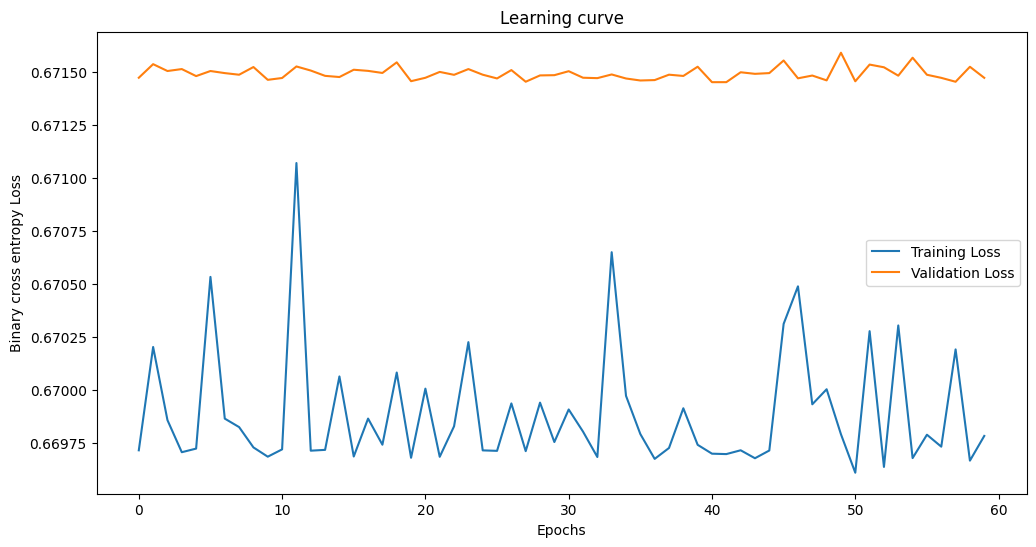

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'],label = 'Training Loss')
plt.plot(hist.history['val_loss'],label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary cross entropy Loss')
plt.title('Learning curve')
plt.legend()
plt.show()

In [28]:
model.evaluate(X_train,Y_train)

1053/1053 [==============================] - 3s 3ms/step - loss: 0.5020 - accuracy: 0.7584


[0.5019966959953308, 0.7583729028701782]

In [29]:
model.evaluate(X_test,Y_test)

264/264 [==============================] - 1s 4ms/step - loss: 0.4999 - accuracy: 0.7577


[0.49985677003860474, 0.7577196955680847]